In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the CSV file
file_path = 'stock_data.csv' 
stock_data = pd.read_csv(file_path)

In [3]:
# Converting Date column to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [4]:
# Pivot the data to have dates as index and tickers as columns for Adjusted Close prices
pivot_data = stock_data.pivot(index='Date', columns='Ticker', values='Adj Close')

In [5]:
# Calculating daily returns
daily_returns = pivot_data.pct_change().dropna()

# Calculate expected returns and volatility
expected_returns = daily_returns.mean()
volatility = daily_returns.std()

In [6]:
# Computing the correlation matrix
correlation_matrix = daily_returns.corr()

# Number of assets
num_assets = len(expected_returns)

# Generating random portfolios
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []

In [7]:
# Function to calculate portfolio statistics
def portfolio_performance(weights, expected_returns, covariance_matrix):
    returns = np.dot(weights, expected_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return returns, volatility

In [8]:
# Calculating the covariance matrix of the daily returns
cov_matrix = daily_returns.cov()

In [9]:
# Generate random portfolios and calculate their performance
for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    weights_record.append(weights)
    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = portfolio_return / portfolio_volatility

In [10]:
# Locate the portfolio with the maximum Sharpe Ratio
max_sharpe_idx = np.argmax(results[2])
sdp, rp = results[1, max_sharpe_idx], results[0, max_sharpe_idx]
max_sharpe_allocation = weights_record[max_sharpe_idx]

In [11]:
# Locate the portfolio with the minimum volatility
min_vol_idx = np.argmin(results[1])
sdp_min, rp_min = results[1, min_vol_idx], results[0, min_vol_idx]
min_vol_allocation = weights_record[min_vol_idx]

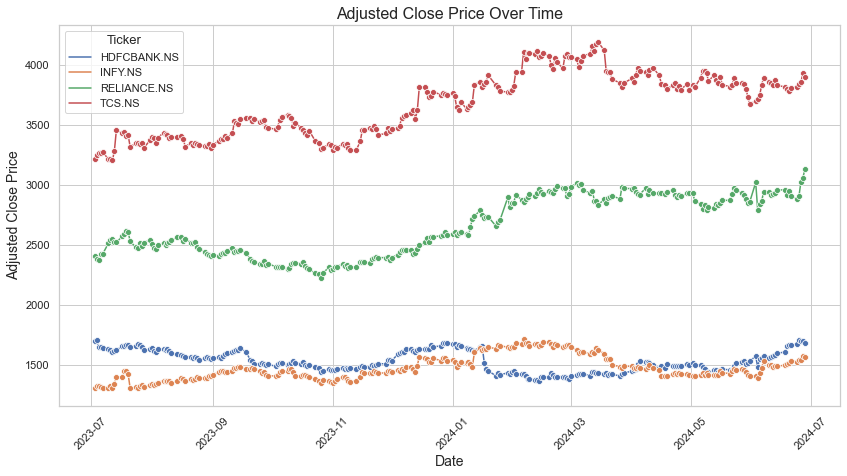

In [15]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

The graph shows the four companies' adjusted close prices (HDFCBANK.NS, INFY.NS, RELIANCE.NS, and TCS.NS) as a function of time between July 2023 and July 2024. The data indicates that TCS has the highest adjusted close prices, with RELIANCE, HDFCBANK, and INFY (Infosys) following closely after. Strong performance is indicated by the prices of RELIANCE and TCS, which are clearly trending upward, whilst HDFCBANK and INFY are more stable and have considerably smaller price swings.

Let's now calculate the 200-day and 50-day moving averages and plot them alongside each stock's adjusted close price:

Columns in stock_data: ['Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Daily Return']


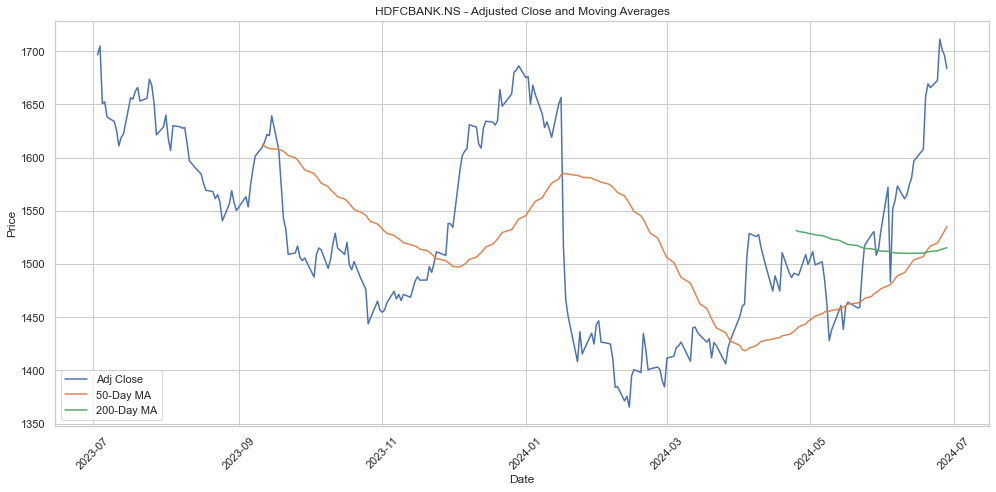

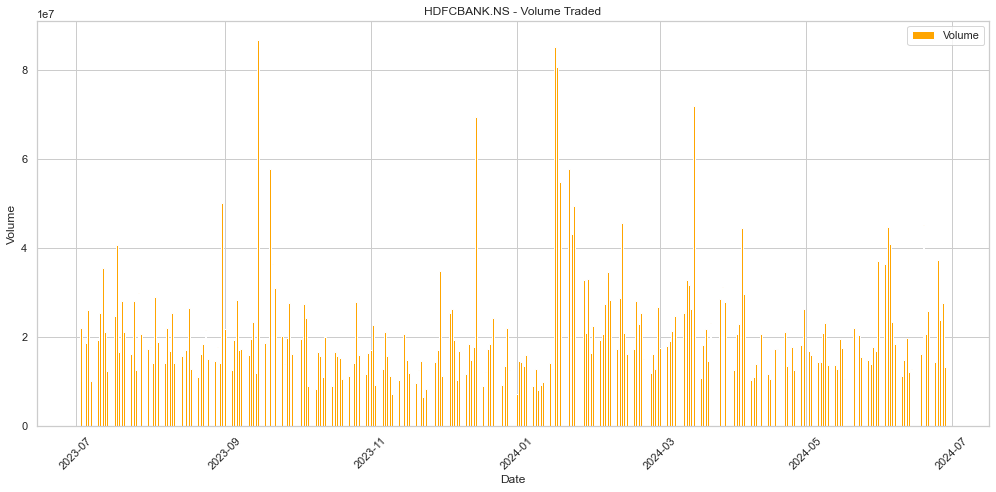

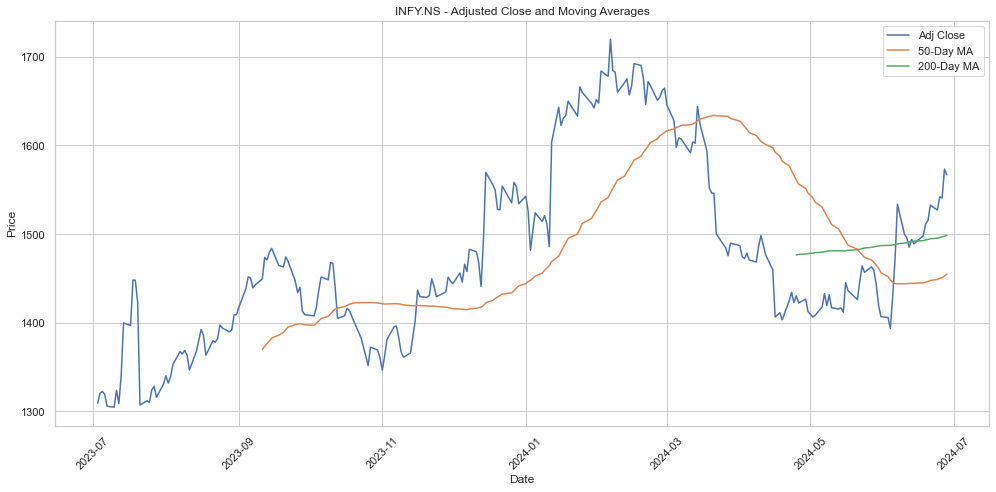

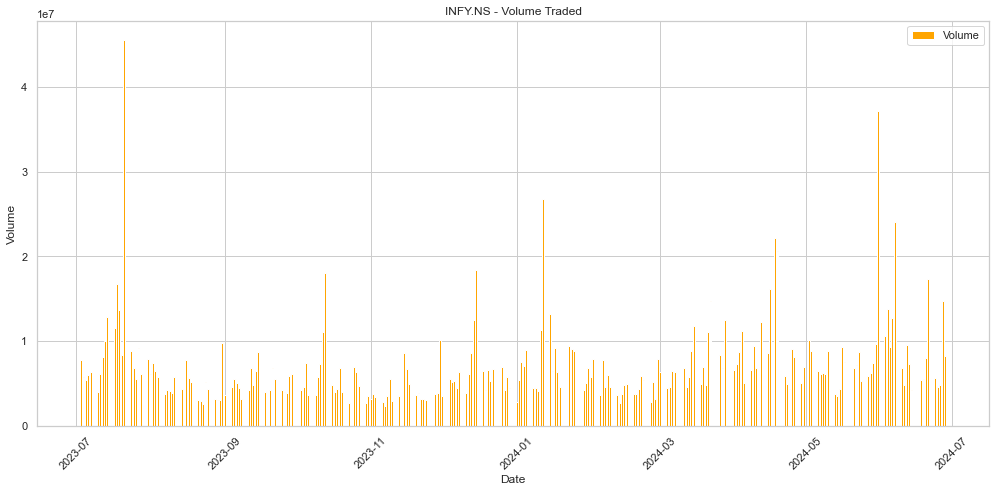

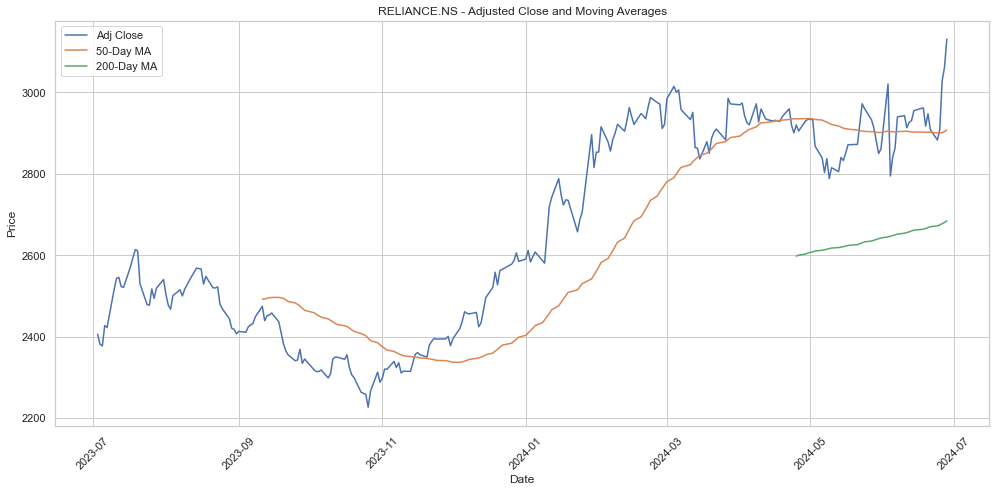

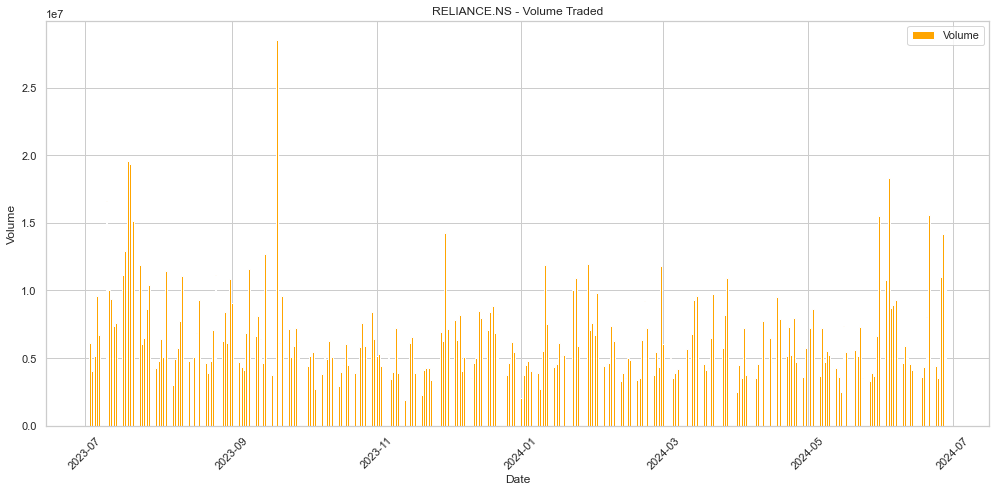

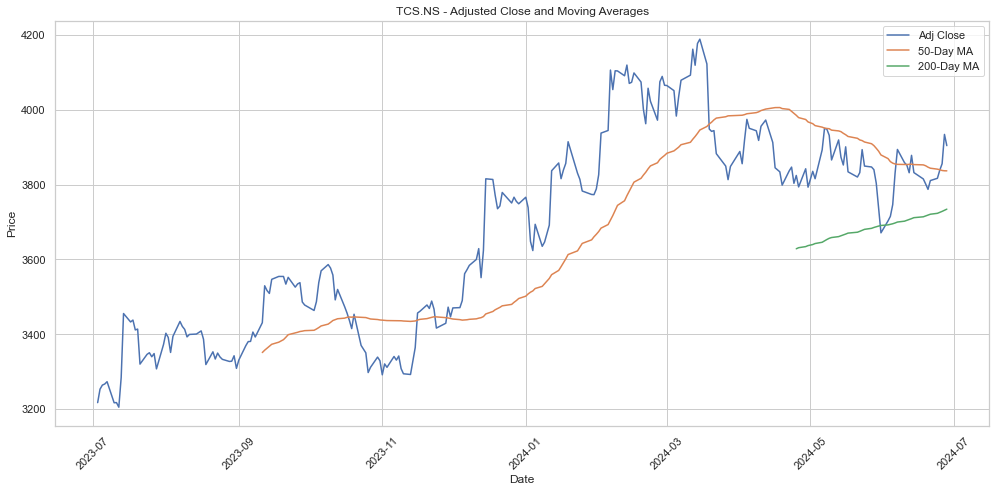

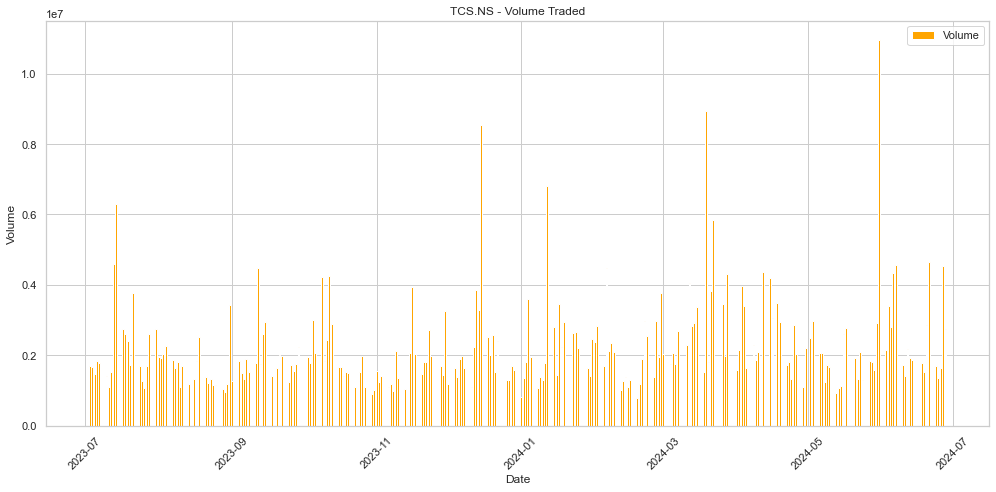

In [27]:
#Now,computing the 50 and 200 day moving averages and plot these along with the Adjusted Close price for each stock:
short_window = 50
long_window = 200

if 'Date' not in stock_data.index.names:
    stock_data.set_index('Date', inplace=True)

# Print column names to verify
print("Columns in stock_data:", stock_data.columns.tolist())

# Get unique tickers
unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    
    # Check if required columns exist
    required_columns = ['Adj Close', 'Volume']
    missing_columns = [col for col in required_columns if col not in ticker_data.columns]
    
    if missing_columns:
        print(f"Error: Missing columns for {ticker}: {missing_columns}")
        continue
    
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()
    
    # Plot Adjusted Close and Moving Averages
    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
        # Plot Volume
    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

The moving averages demonstrate that the prices of HDFCBANK and INFY first decrease before eventually beginning to rise. With regard to their adjusted close prices, TCS and RELIANCE have a more steady increasing tendency. The volume traded graphs show notable trading activity at different times, with strong trading volumes shown by spikes in HDFCBANK and RELIANCE at the beginning of 2024. Understanding price fluctuations and trading habits is essential for making well-informed investing decisions. These insights play a critical role in this process.

Now, this is distribution of daily returns of these stocks looks like:

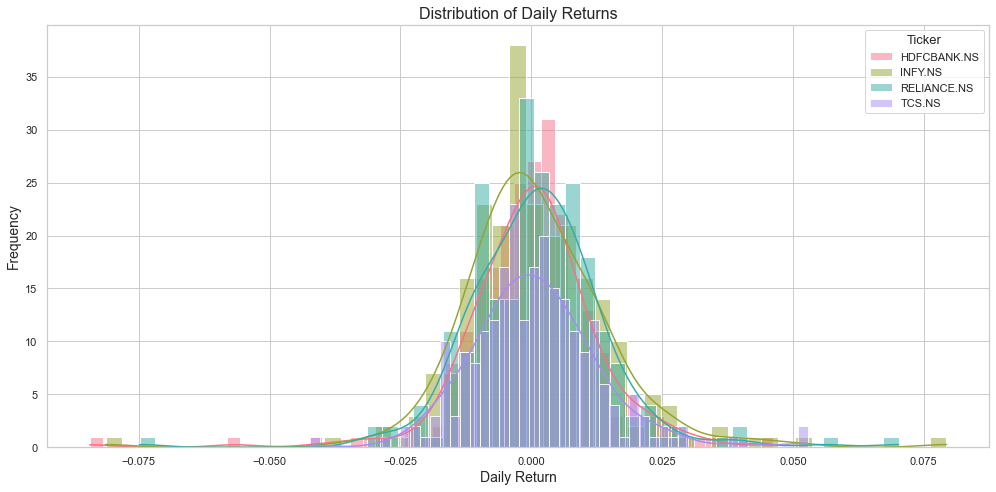

In [24]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

# Defining a custom color palette
color_palette = sns.color_palette("husl", n_colors=len(unique_tickers))

for i, ticker in enumerate(unique_tickers):
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, 
                 label=ticker, alpha=0.5, color=color_palette[i])

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

Since most daily returns are near the average return, the distributions are roughly normal and centred around zero. On the other hand, there are tails on both sides, which represent sporadic large profits or losses. In comparison to HDFCBANK and TCS, INFY and RELIANCE seem to have somewhat larger distributions, which implies higher volatility.

Let's now analyse whether any correlation exists between any of these stocks:

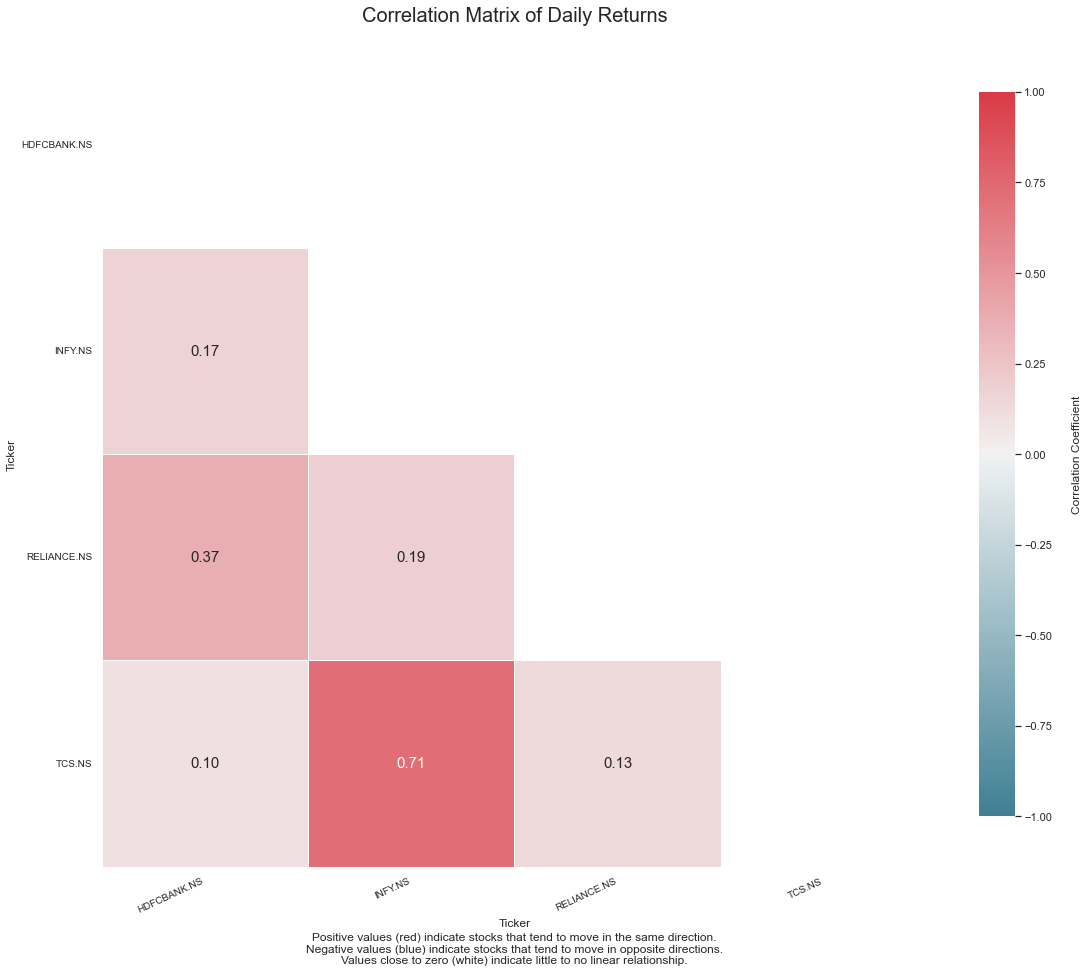

In [39]:
# Calculate daily returns
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')

# Calculate correlation matrix
correlation_matrix = daily_returns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))
sns.set(style='white')

# Create a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create the heatmap with a custom mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": 0.8},
            annot_kws={"size": 15})

# Customize the plot
plt.title('Correlation Matrix of Daily Returns', fontsize=20, pad=20)
plt.xticks(rotation=25, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Add a color bar label
cbar = plt.gcf().axes[-1]
cbar.set_ylabel('Correlation Coefficient', fontsize=12, labelpad=20)

# Add text explaining the correlation
plt.text(0.5, -0.1, 
         "Positive values (red) indicate stocks that tend to move in the same direction.\n"
         "Negative values (blue) indicate stocks that tend to move in opposite directions.\n"
         "Values close to zero (white) indicate little to no linear relationship.",
         ha='center', va='center', fontsize=12, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

The strong positive correlation (0.71) between TCS and INFY suggests that they often move in the same direction. With RELIANCE, HDFCBANK has a moderately favourable correlation (0.37), whereas its correlations with INFY (0.17) and TCS (0.10) are low. There is little association between RELIANCE and TCS (0.13) and INFY (0.19). The different correlations indicate the benefits of diversification; lowering the total risk of a portfolio by mixing equities with lower correlations.

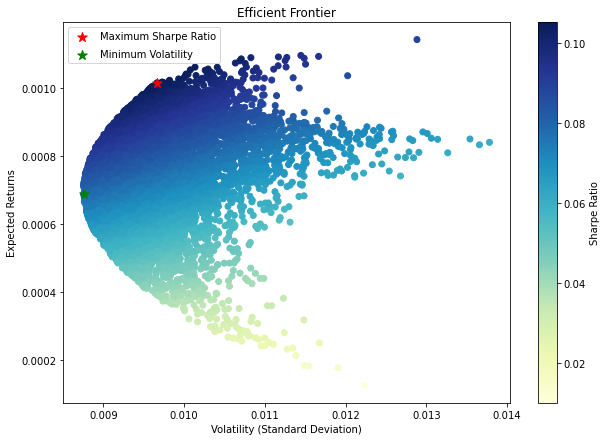

In [12]:
# Plot the efficient frontier
plt.figure(figsize=(10, 7))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(sdp, rp, marker='*', color='r', s=100, label='Maximum Sharpe Ratio')
plt.scatter(sdp_min, rp_min, marker='*', color='g', s=100, label='Minimum Volatility')
plt.legend(labelspacing=0.8)
plt.show()

Every dot symbolises a portfolio, and the hue designates the Sharpe ratio, which quantifies return after adjusting for risk. The best portfolios are those that are closest to the y-axis and on the leftmost edge of the frontier, where the predicted returns are highest for a given degree of volatility. The gradient indicates that superior risk-adjusted returns are provided by portfolios with higher Sharpe ratios (darker blue).

In [13]:
# Display results
print("Maximum Sharpe Ratio Portfolio Allocation\n")
print("Annualized Return:", rp * 252)
print("Annualized Volatility:", sdp * np.sqrt(252))
print("Allocation:")
for i, symbol in enumerate(expected_returns.index):
    print(f"{symbol}: {max_sharpe_allocation[i]:.2%}")

print("\nMinimum Volatility Portfolio Allocation\n")
print("Annualized Return:", rp_min * 252)
print("Annualized Volatility:", sdp_min * np.sqrt(252))
print("Allocation:")
for i, symbol in enumerate(expected_returns.index):
    print(f"{symbol}: {min_vol_allocation[i]:.2%}")

Maximum Sharpe Ratio Portfolio Allocation

Annualized Return: 0.25611855508880854
Annualized Volatility: 0.15341120261554467
Allocation:
HDFCBANK.NS: 1.38%
INFY.NS: 3.96%
RELIANCE.NS: 50.20%
TCS.NS: 44.47%

Minimum Volatility Portfolio Allocation

Annualized Return: 0.1734510504583494
Annualized Volatility: 0.1389805790079682
Allocation:
HDFCBANK.NS: 31.81%
INFY.NS: 2.95%
RELIANCE.NS: 24.47%
TCS.NS: 40.76%


So, stock market portfolio optimization operates in this manner. To get diversity, stock market portfolio optimization entails evaluating price patterns, computing predicted returns and volatilities, and figuring out the relationships between various stocks.